<a href="https://colab.research.google.com/github/abiget/word_letter_freq_count_and_sum_numbers_in_file_pyspark/blob/main/HPC_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import spark and driver mount to load data

In [ ]:
from google.colab import drive
drive.mount("/content/driver")

Mounted at /content/driver


In [ ]:
pip install pyspark

     |████████████████████████████████| 212.4 MB 63 kB/s 
     |████████████████████████████████| 198 kB 55.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=6c4e929f1c542514ed299184cb8f4fa8e8800678336afda48a0637ccce0f4a08
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [ ]:
spark=SparkSession.builder\
    .master("local[*]")\
    .appName("WordCount")\
    .getOrCreate()

In [ ]:
sc = spark.sparkContext

In [ ]:
# load data from google drive 
logData = sc.textFile("/content/driver/MyDrive/HPC Assignment/book.txt").cache()

#Replace words to lowercase save to words_lower.txt


In [ ]:
lowercase_lines = logData.map(lambda line: line.lower())
with open('/content/driver/MyDrive/HPC Assignment/words_lower.txt', 'a') as f:
  for line in lowercase_lines.collect():
    f.write(line)
    f.write('\n')

In [ ]:
# # to make things work well
words_lower_logData = sc.textFile("/content/driver/MyDrive/HPC Assignment/words_lower.txt").cache()
words_lower_logData.take(10)

['catching fire',
 '',
 'part i "the spark"',
 '',
 "i clasp the flask between my hands even though the warmth from the tea has long since leached into the frozen air. my muscles are clenched tight against the cold. if a pack of wild dogs were to appear at this moment, the odds of scaling a tree before they attacked are not in my favor. i should get up, move around, and work the stiffness from my limbs. but instead i sit, as motionless as the rock beneath me, while the dawn begins to lighten the woods. i can't fight the sun. i can only watch helplessly as it drags me into a day that i've been dreading for months. by noon they will all be at my new house in the victor's village. the reporters, the camera crews, even effie trinket, my old escort, will have",
 '',
 "made their way to district 12 from the capitol. i wonder if effie will still be wearing that silly pink wig, or if she'll be sporting some other unnatural color especially for the victory tour. there will be others waiting, to

#Replace space with '-' in words-.txt

In [ ]:
#replace all occurence of white space 
white_space_with_dash = logData.map(lambda line: line.replace(" ", "-", -1))
with open('/content/driver/MyDrive/HPC Assignment/words-.txt', 'a') as f:
  for line in white_space_with_dash.collect():
    f.write(line)
    f.write('\n')

In [ ]:
# # to make things work well
white_space_with_dash_load = sc.textFile("/content/driver/MyDrive/HPC Assignment/words-.txt").cache()
white_space_with_dash_load.take(10)

['Catching-fire',
 '',
 'PART-I-"THE-SPARK"',
 '',
 "I-clasp-the-flask-between-my-hands-even-though-the-warmth-from-the-tea-has-long-since-leached-into-the-frozen-air.-My-muscles-are-clenched-tight-against-the-cold.-If-a-pack-of-wild-dogs-were-to-appear-at-this-moment,-the-odds-of-scaling-a-tree-before-they-attacked-are-not-in-my-favor.-I-should-get-up,-move-around,-and-work-the-stiffness-from-my-limbs.-But-instead-I-sit,-as-motionless-as-the-rock-beneath-me,-while-the-dawn-begins-to-lighten-the-woods.-I-can't-fight-the-sun.-I-can-only-watch-helplessly-as-it-drags-me-into-a-day-that-I've-been-dreading-for-months.-By-noon-they-will-all-be-at-my-new-house-in-the-Victor's-Village.-The-reporters,-the-camera-crews,-even-Effie-Trinket,-my-old-escort,-will-have",
 '',
 "made-their-way-to-District-12-from-the-Capitol.-I-wonder-if-Effie-will-still-be-wearing-that-silly-pink-wig,-or-if-she'll-be-sporting-some-other-unnatural-color-especially-for-the-Victory-Tour.-There-will-be-others-waiting,-to


# Word counter 



In [ ]:
# split with white space and unroll 
words = logData.flatMap(lambda line: line.split())

#clean the non alpha character
clean_words = words.filter(lambda letter: letter.isalpha()).map(lambda word: word.lower())
print("Total Number of Words :", clean_words.count())

# find unique number of words
clean_unique_words = clean_words.distinct()
print("Total unique Words :", clean_unique_words.count())

Total Number of Words : 81476
Total unique Words : 6553


#Letter frequency counter

In [ ]:
from operator import  add
letter_in_oneLine = clean_words.flatMap(lambda word: list(word))
# assign 1 to each letter as a value
letter_key_value_pair = letter_in_oneLine.map(lambda letter: (letter, 1))
# add the value of each key 
letter_frequency = letter_key_value_pair.reduceByKey(add)
print("Letter Count\n")
print(letter_frequency.collect())

Letter Count

[('c', 7392), ('h', 20500), ('i', 24205), ('g', 7428), ('r', 15791), ('p', 5435), ('l', 12003), ('s', 19426), ('b', 5904), ('y', 6927), ('d', 10840), ('j', 575), ('a', 24680), ('t', 31595), ('n', 22140), ('f', 7539), ('e', 39693), ('k', 3977), ('w', 7625), ('m', 8478), ('v', 2941), ('o', 24109), ('u', 9036), ('z', 218), ('q', 259), ('x', 314)]


# Sum numbers in numbers in each text file


In [ ]:
numbers = sc.textFile("/content/driver/MyDrive/HPC Assignment/Numbers.txt").cache()
numbers2 = sc.textFile("/content/driver/MyDrive/HPC Assignment/Numbers2.txt").cache()
numbers4 = sc.textFile("/content/driver/MyDrive/HPC Assignment/Numbers4.txt").cache()
numbers8 = sc.textFile("/content/driver/MyDrive/HPC Assignment/Numbers8.txt").cache()
numbers16 = sc.textFile("/content/driver/MyDrive/HPC Assignment/Numbers16.txt").cache()
numbers32 = sc.textFile("/content/driver/MyDrive/HPC Assignment/Numbers32.txt").cache()

In [ ]:
def check_no_string(numbers_file):
  for num in numbers_file.collect():
    if type(num) != str:
      print(type(num))

In [ ]:
from operator import  add
#sum of numbers for each text file
def addNumbers(numbers_add):
  sum_all = numbers_add.reduce(add)
  return sum_all
#cast each number to float
def asFloat(num):
  return float(num)

In [ ]:
#check for non-string 
check_no_string(numbers)
check_no_string(numbers2)
check_no_string(numbers4)
check_no_string(numbers8)
check_no_string(numbers16)
check_no_string(numbers32)

In [ ]:
import time
executionTimes = []
sizeOffiles = []

In [ ]:
#cast to float
numbers_float = numbers.map(asFloat)
#add all of the numbers in numbers.txt
start = time.time()
sum = addNumbers(numbers_float)
end = time.time()
executionTimes.append(end-start)
sizeOffiles.append(len(numbers_float.collect()))
print("The sum of numbers in numbers.txt = ", sum)

The sum of numbers in numbers.txt =  110144916.0


In [ ]:
#cast to float
numbers2_float = numbers2.map(asFloat)
#add all of the numbers in numbers2.txt
start = time.time()
sum = addNumbers(numbers2_float)
end = time.time()
executionTimes.append(end-start)
sizeOffiles.append(len(numbers2_float.collect()))
print("The sum of numbers in numbers2.txt = ", sum)

The sum of numbers in numbers2.txt =  1099642890.0


In [ ]:
#cast to float
numbers4_float = numbers4.map(asFloat)
#add all of the numbers in numbers4.txt
start = time.time()
sum = addNumbers(numbers4_float)
end = time.time()
executionTimes.append(end-start)
sizeOffiles.append(len(numbers4_float.collect()))
print("The sum of numbers in numbers4.txt = ", sum)

The sum of numbers in numbers4.txt =  2199749007.0


In [ ]:
#cast to float
numbers8_float = numbers8.map(asFloat)
#add all of the numbers in numbers8.txt
start = time.time()
sum = addNumbers(numbers8_float)
end = time.time()
executionTimes.append(end-start)
sizeOffiles.append(len(numbers8_float.collect()))
print("The sum of numbers in numbers8.txt = ", sum)

The sum of numbers in numbers8.txt =  4403588793.0


In [ ]:
#cast to float
numbers16_float = numbers16.map(asFloat)
#add all of the numbers in numbers16.txt
start = time.time()
sum = addNumbers(numbers16_float)
end = time.time()
executionTimes.append(end-start)
sizeOffiles.append(len(numbers16_float.collect()))
print("The sum of numbers in numbers16.txt = ", sum)

The sum of numbers in numbers16.txt =  8797696176.0


In [ ]:
#cast to float
numbers32_float = numbers32.map(asFloat)
#add all of the numbers in numbers32.txt
start = time.time()
sum = addNumbers(numbers32_float)
end = time.time()
executionTimes.append(end-start)
sizeOffiles.append(len(numbers32_float.collect()))
print("The sum of numbers in numbers16.txt = ", sum)

The sum of numbers in numbers16.txt =  17597420425.0


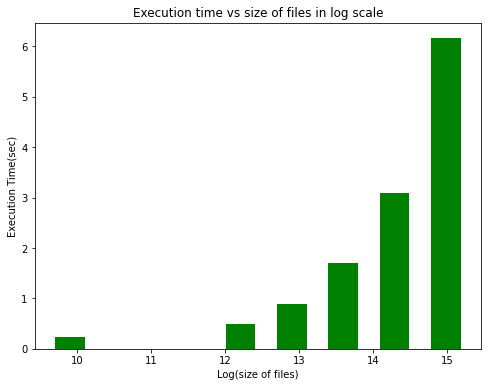

In [ ]:
#plot number of execution time vs log scale of size of the files
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (8, 6)) 
plt.bar(np.log(sizeOffiles), executionTimes, color ='green', width = 0.4) 
plt.xlabel("Log(size of files)") 
plt.ylabel("Execution Time(sec)") 
plt.title("Execution time vs size of files in log scale") 
plt.show()